In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import neurokit as nk
import pandas as pd
import numpy as np
import seaborn as sns
directory = './respiration_raw/'

In [2]:
df = []
for f in os.listdir(directory):
    if f[-1]!='p':
        continue
    df.append(pickle.load(open(directory+f,'rb')))
    print(f)
df = pd.concat(df).reset_index(drop=True)

8008f00d-2549-46e4-ab1f-01542c1076e2.p
0d4e87ed-9694-4ba8-b529-d8f2def047cf.p


<IPython.core.display.Javascript object>


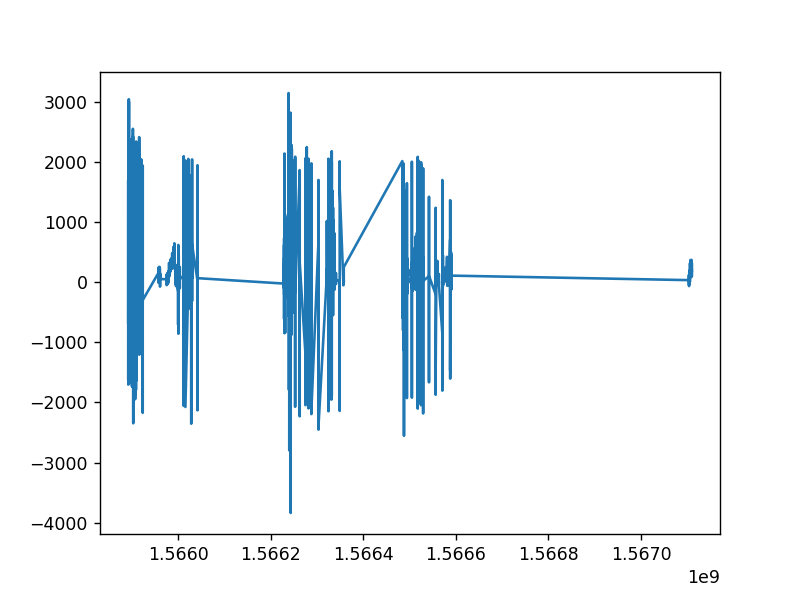

<IPython.core.display.Javascript object>


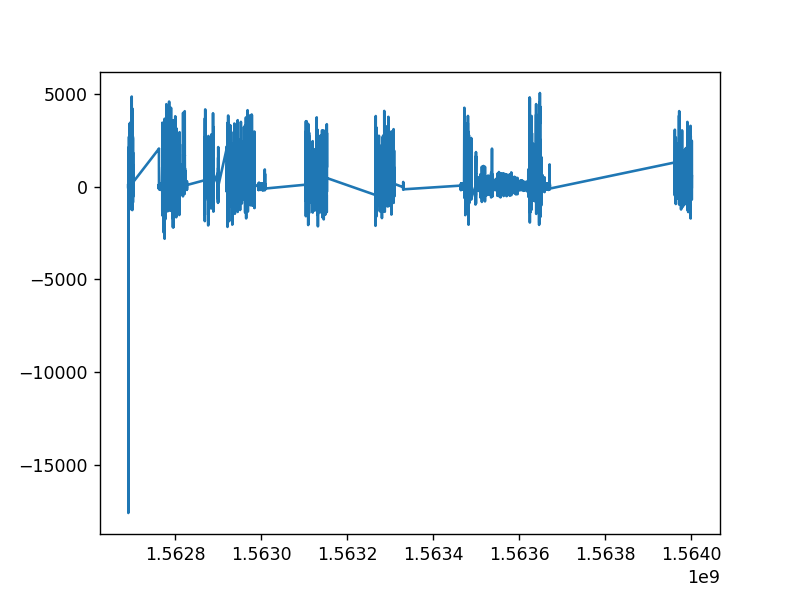

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import signal

def preProcessing(X1,Fs=25,fil_type='ppg'):
    X1 = signal.detrend(X1,axis=0,type='constant')
    b = signal.firls(65,np.array([0,0.15, 0.2, 2 ,2.15,Fs/2]),np.array([0, 0 ,1 ,1 ,0, 0]),
                     np.array([100*0.02,0.02,0.02]),fs=Fs)
    X2 = np.zeros((np.shape(X1)[0],X1.shape[1]))
    for i in range(X2.shape[1]):
        X2[:,i] = signal.convolve(X1[:,i],b,mode='same')
    return X2

for user in np.unique(df['user'].values):
    df_user = df[df.user.isin([user])]
    data = df_user[['time','respiration']].values
    data = data[data[:,0].argsort()]
#     data[:,1] = preProcessing(data[:,1].reshape(-1,1)).reshape(-1)
    plt.figure()
    plt.plot(data[:,0],data[:,1])
    plt.show()

<IPython.core.display.Javascript object>


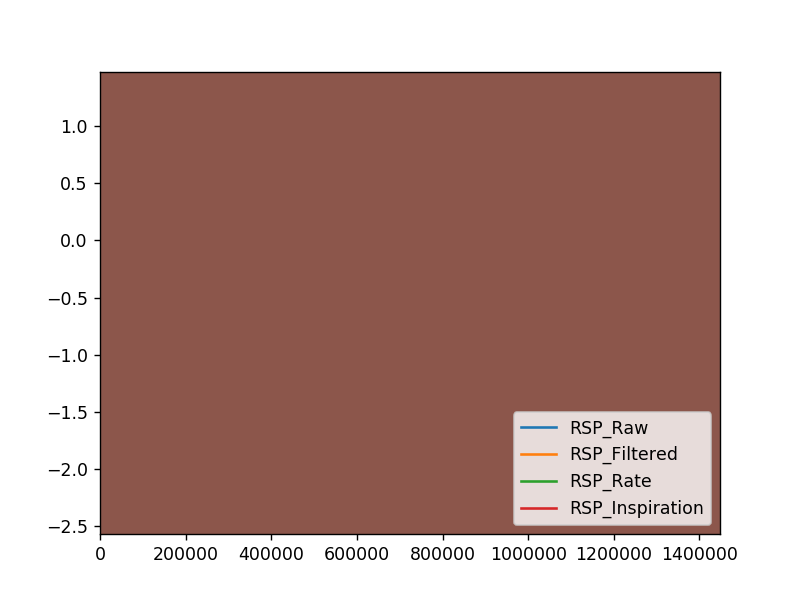

In [5]:
bio = nk.bio_process(rsp=data[:,1], sampling_rate=21.33)
# Plot the processed dataframe, normalizing all variables for viewing purpose
nk.z_score(bio["df"]).plot()

In [6]:
bio

{'RSP': {'Cycles_Onsets': [78,
   162,
   215,
   363,
   448,
   506,
   557,
   679,
   789,
   872,
   963,
   1020,
   1104,
   1154,
   1219,
   1302,
   1419,
   1455,
   1518,
   1573,
   1639,
   1682,
   1773,
   1855,
   1978,
   2061,
   2116,
   2184,
   2264,
   2314,
   2389,
   2453,
   2593,
   2716,
   2795,
   2897,
   3023,
   3135,
   3202,
   3271,
   3328,
   3419,
   3522,
   3586,
   3695,
   3765,
   3863,
   3956,
   3999,
   4090,
   4185,
   4288,
   4336,
   4410,
   4465,
   4507,
   4561,
   4619,
   4711,
   4770,
   4825,
   4896,
   4951,
   4997,
   5077,
   5142,
   5221,
   5286,
   5368,
   5432,
   5511,
   5629,
   5726,
   5769,
   5810,
   5899,
   5987,
   6095,
   6266,
   6350,
   6416,
   6480,
   6514,
   6609,
   6662,
   6722,
   6789,
   6870,
   6935,
   7008,
   7076,
   7163,
   7229,
   7280,
   7327,
   7434,
   7540,
   7582,
   7651,
   7675,
   7741,
   7805,
   7855,
   7930,
   7998,
   8062,
   8116,
   8216,
   8291,
   8378

<IPython.core.display.Javascript object>


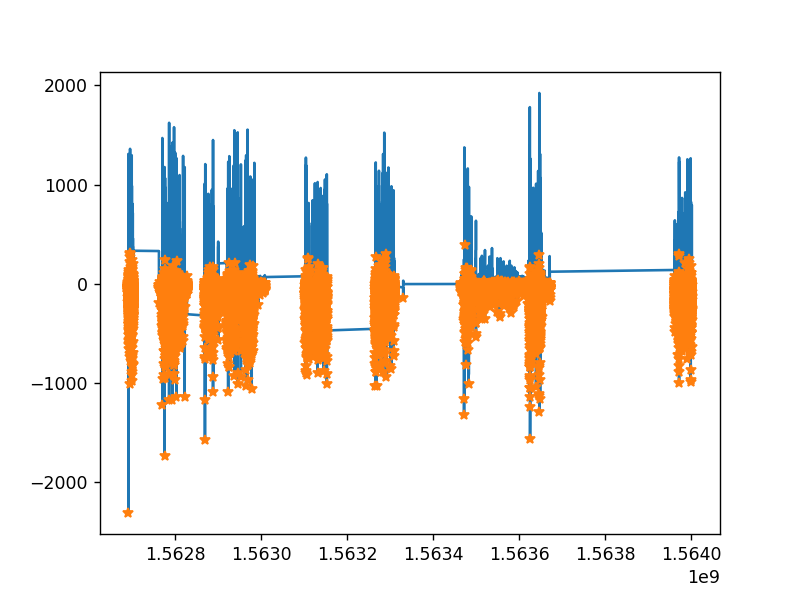

In [26]:
%matplotlib notebook
plt.plot(data[:,0],bio['df']['RSP_Filtered'])
plt.plot(data[np.array(bio['RSP']['Cycles_Onsets']),0],bio['df']['RSP_Filtered'][bio['RSP']['Cycles_Onsets']],'*')

In [12]:
bio['df'].shape

(1447997, 4)

In [13]:
data.shape

(1447997, 2)

In [20]:
np.max(bio['RSP']['Cycles_Onsets'])

1447959